# Perceptron Model with Iris Dataset


This notebook to train on how to build and train a Perceptron model using the Iris dataset. The Iris dataset is a classic dataset used in machine learning and statistics, consisting of 150 samples of iris flowers with four features each (sepal length, sepal width, petal length, and petal width) and three classes (Iris-setosa, Iris-versicolor, and Iris-virginica).

In this notebook, we will do the following:
* Load and prepare the Iris dataset.
* Split the dataset into training and testing sets.
* Standardize the features.
* Train a Perceptron model.
* Evaluate the model's performance.


# Import libraries

In [17]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
iris = load_iris()

In [46]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# EDA

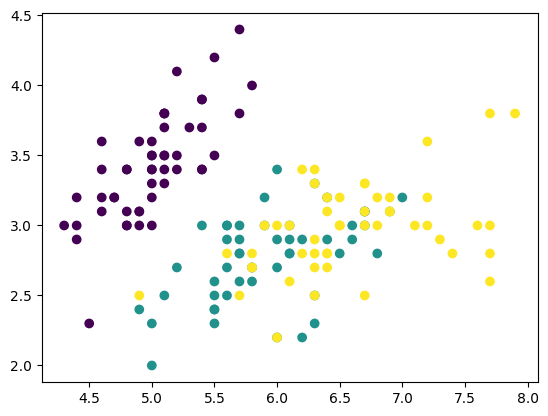

In [47]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['class'])
plt.show()

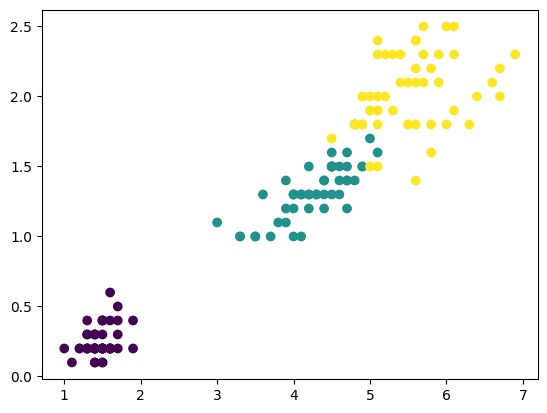

In [48]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['class'])
plt.show()

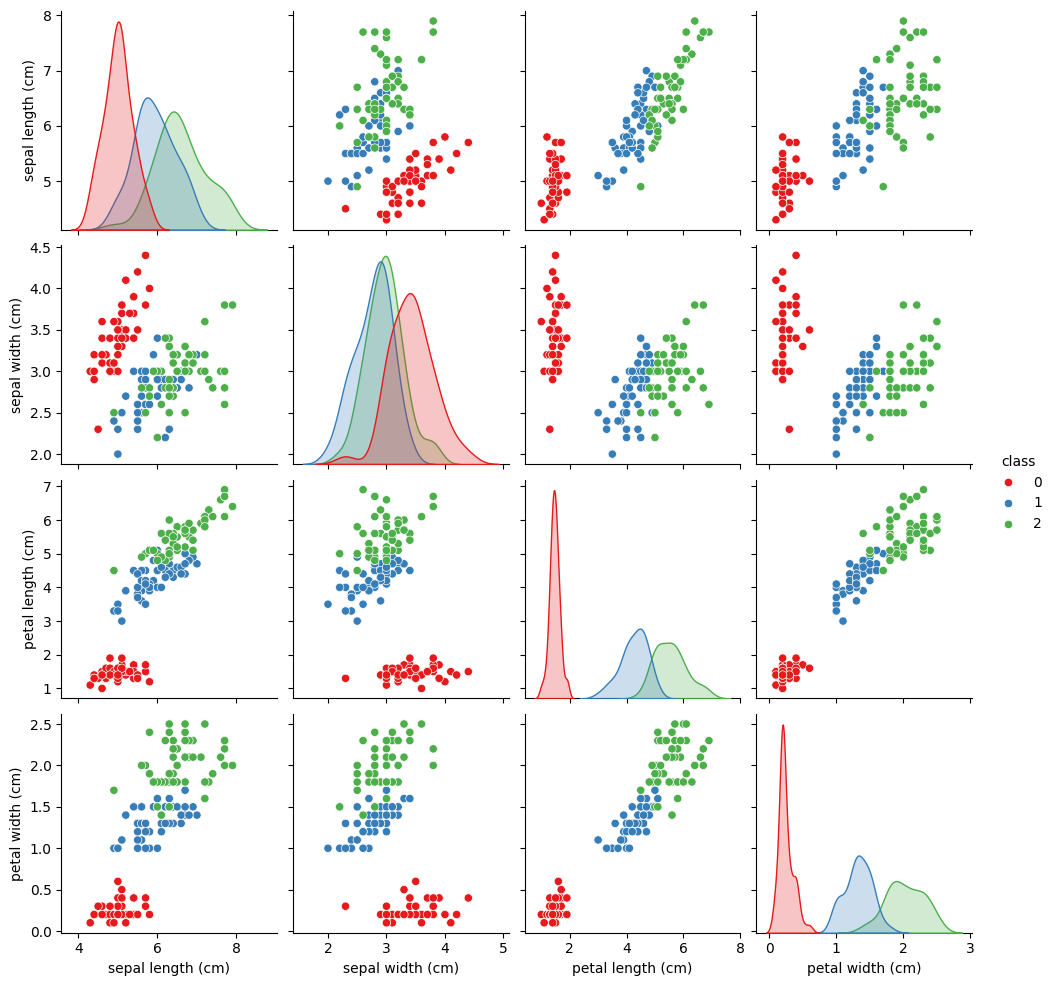

In [49]:
sns.pairplot(df, hue = 'class', vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], palette = 'Set1')
plt.show()

# Split the dataset into training and testing sets

In [50]:
X = df.drop('class', axis=1)
y = df['class']
X.shape, y.shape

((150, 4), (150,))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

# Standardize the features

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.34288234, -0.50470526,  0.51173177, -0.02555604],
       [-0.13835603,  1.88726279, -1.2249145 , -1.23610527],
       [ 2.26783585, -0.98309887,  1.78527236,  1.45400413],
       [ 0.22257275, -0.26550845,  0.39595535,  0.37796037],
       [ 1.1850495 , -0.50470526,  0.56961997,  0.2434549 ],
       [-0.49928482,  0.93047557, -1.34069092, -1.1015998 ],
       [-0.25866563, -0.26550845, -0.12503853,  0.10894943],
       [ 1.30535909,  0.21288516,  0.7432846 ,  1.45400413],
       [ 0.46319194, -1.93988609,  0.39595535,  0.37796037],
       [-0.01804644, -0.74390206,  0.0486261 , -0.02555604],
       [ 0.82412072,  0.45208196,  0.7432846 ,  1.05048772],
       [-1.22114238, -0.02631165, -1.39857913, -1.50511621],
       [-0.37897522,  1.16967238, -1.45646733, -1.37061074],
       [-1.10083279,  0.21288516, -1.34069092, -1.50511621],
       [-0.8602136 ,  1.88726279, -1.34069092, -1.23610527],
       [ 0.58350153,  0.69127877,  0.51173177,  0.51246584],
       [ 0.82412072, -0.

# Initialize and train the Perceptron model

In [53]:
model = Perceptron(max_iter=200, eta0=0.1, random_state=42)
model.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=200, random_state=42)

# Predict the labels of the test set

In [54]:
y_pred = model.predict(X_test)

# Calculate the accuracy of the model

In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy :', accuracy)

print(classification_report(y_pred, y_test))

Accuracy : 0.84
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.65      0.79        23
           2       0.50      1.00      0.67         8

    accuracy                           0.84        50
   macro avg       0.83      0.88      0.82        50
weighted avg       0.92      0.84      0.85        50



# Display the first few predictions

In [56]:
print(y_pred[:5])

[1 0 2 1 1]


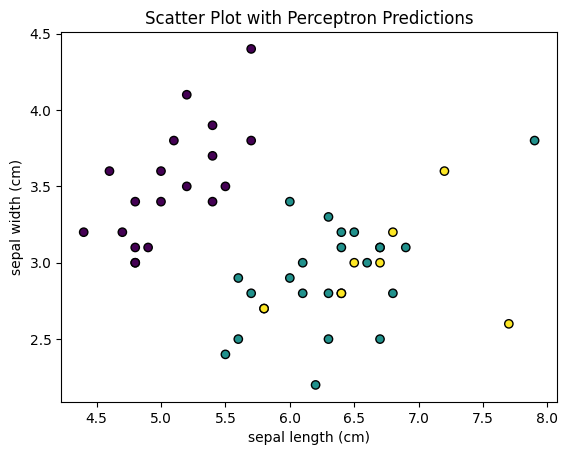

In [64]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_pred,edgecolor='k', marker='o', cmap='viridis')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Scatter Plot with Perceptron Predictions')
plt.show()

# **thank you (:**